## Menentukan Pertanyaan Bisnis

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Hafiza Sidqi Amini
- **Email:** hafizasidqiamini027@gmail.com
- **ID Dicoding:** fizasidqi

- Bagaimana kualitas udara di 12 stasiun dalam kurun waktu 2013-2017?
- Kapan kualitas udara di smeua daerah mencapai angka terbaik dan terburuk?
- Bagaimana kondisi curah hujan setiap lokasi dalam kurun waktu 2013-2017?
- Berapa rata-rata temperatur terendah dan tertinggi yang pernah dialami?

## Import Semua Packages/Library yang Digunakan

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load data yang dibutuhkan
all_df = pd.DataFrame()
for i in os.listdir('data/'):
    df = pd.read_csv('data/'+ i)
    all_df = pd.concat([all_df, df], ignore_index=True)
all_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
238833,28450,2016,5,29,9,17.0,17.0,2.0,7.0,200.0,68.0,23.9,1001.2,-5.3,0.0,NNE,4.3,Huairou
347220,31645,2016,10,9,12,45.0,110.0,6.0,88.0,1200.0,3.0,13.9,1019.8,4.2,0.0,SSE,1.1,Tiantan
82613,12486,2014,8,3,5,140.0,140.0,2.0,14.0,1000.0,115.0,26.9,993.0,22.9,0.0,WNW,0.8,Dingling
87600,17473,2015,2,27,0,3.0,14.0,3.0,2.0,200.0,81.0,1.0,1022.0,-20.1,0.0,NNE,2.0,Dingling
202404,27085,2016,4,2,12,13.0,88.0,2.0,7.0,200.0,91.0,17.5,1012.5,-12.3,0.0,NW,5.0,Gucheng
256687,11240,2014,6,12,7,32.0,71.0,3.0,58.0,600.0,29.0,25.3,1003.4,14.7,0.0,NNE,1.3,Nongzhanguan
121493,16302,2015,1,9,5,58.0,58.0,32.0,77.0,1900.0,4.0,0.0,1027.0,-15.2,0.0,WNW,2.4,Dongsi
238697,28314,2016,5,23,17,81.0,128.0,2.0,29.0,1200.0,101.0,16.8,998.8,14.8,1.8,ENE,2.0,Huairou
91014,20887,2015,7,19,6,46.0,46.0,2.0,58.0,400.0,5.0,21.6,999.4,20.8,0.0,SW,0.6,Dingling
248225,2778,2013,6,24,17,124.0,109.0,19.0,30.0,1300.0,224.0,29.2,996.5,20.9,0.0,S,2.2,Nongzhanguan


### Assessing Data

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [4]:
# cek missing value
all_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [5]:
print("Jumlah duplikasi data", all_df.duplicated().sum())

Jumlah duplikasi data 0


In [6]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

#### Mengganti tipe data

In [7]:
# mengganti tipe data 'year', 'month', 'day', 'hour'
all_df["datetime"] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])
all_df.drop(columns=["year", 'month', 'day', 'hour'], inplace=True)

In [8]:
all_df.sample(5)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
67729,32666,13.0,13.0,2.0,10.0,1000.0,26.0,1.3,1016.8,0.1,0.2,NE,1.3,Changping,2016-11-21 01:00:00
105588,397,275.0,319.0,110.0,147.0,NaN,107.0,13.7,1001.9,2.3,0.0,SE,1.9,Dongsi,2013-03-17 12:00:00
195644,20325,112.0,118.0,4.0,64.0,1000.0,93.0,24.5,992.1,20.6,0.1,ENE,0.4,Gucheng,2015-06-25 20:00:00
39858,4795,32.0,90.0,9.0,NaN,600.0,88.0,23.1,1000.8,15.2,0.0,S,1.4,Changping,2013-09-16 18:00:00
197151,21832,8.0,53.0,2.0,11.0,300.0,143.0,29.3,1000.3,15.8,0.0,WNW,1.1,Gucheng,2015-08-27 15:00:00


#### Menangani missing value

In [9]:
# Mengimplementasikan interpolation untuk menangani missing value pada setiap kolom
all_df["PM2.5"].interpolate(inplace=True)
all_df["PM10"].interpolate(inplace=True)
all_df["SO2"].interpolate(inplace=True)
all_df["NO2"].interpolate(inplace=True)
all_df["CO"].interpolate(inplace=True)
all_df["O3"].interpolate(inplace=True)
all_df["TEMP"].interpolate(inplace=True)
all_df["PRES"].interpolate(inplace=True)
all_df["DEWP"].interpolate(inplace=True)
all_df["RAIN"].interpolate(inplace=True)
all_df["WSPM"].interpolate(inplace=True)

In [10]:
# melihat nilai dominan pada kolom "wd"
all_df["wd"].value_counts()

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64

In [11]:
all_df["wd"].fillna(value="NE", inplace=True)

In [12]:
# crosscheck
all_df.isna().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore all_df

In [13]:
all_df.describe(include='all')

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064,NaN
mean,17532.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


In [14]:
# melihat persebaran PM 2.5 pada setiap stasiun
all_df.groupby(by="station").agg({
    "PM2.5": ["max", "min", "mean", "std"]
})

PM2.5                           
                 max  min       mean        std
station                                        
Aotizhongxin   898.0  3.0  82.540623  81.956401
Changping      882.0  2.0  70.986438  72.397726
Dingling       881.0  3.0  66.845557  73.445093
Dongsi         737.0  3.0  86.144243  86.260246
Guanyuan       680.0  2.0  82.897522  81.070279
Gucheng        770.0  2.0  84.074802  82.994634
Huairou        762.0  2.0  69.501747  70.990900
Nongzhanguan   844.0  2.0  85.079472  86.692516
Shunyi         941.0  2.0  79.437962  81.500282
Tiantan        821.0  3.0  82.033097  80.895489
Wanliu         957.0  2.0  83.467612  82.125058
Wanshouxigong  999.0  3.0  85.067548  85.999698

In [15]:
# melihat persebaran PM 10 pada setiap stasiun
all_df.groupby(by="station").agg({
    "PM10": ["max", "min", "mean", "std"]
})

PM10                            
                 max  min        mean        std
station                                         
Aotizhongxin   984.0  2.0  110.210033  95.262531
Changping      999.0  2.0   94.788575  83.928515
Dingling       905.0  2.0   84.113713  80.242081
Dongsi         955.0  2.0  110.347617  98.239918
Guanyuan       999.0  2.0  109.372349  92.340966
Gucheng        994.0  2.0  119.261567  97.533240
Huairou        993.0  2.0   92.422670  84.792119
Nongzhanguan   995.0  2.0  109.384022  96.088407
Shunyi         999.0  2.0   99.271936  90.579040
Tiantan        988.0  2.0  106.537076  90.277762
Wanliu         951.0  2.0  110.707858  93.539605
Wanshouxigong  961.0  2.0  112.505795  98.132120

In [16]:
# melihat persebaran SO2 pada setiap stasiun
all_df.groupby(by="station").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
                 max     min       mean        std
station                                           
Aotizhongxin   341.0  0.2856  17.459251  22.702284
Changping      310.0  0.2856  14.943066  21.012174
Dingling       156.0  0.2856  11.797849  15.652372
Dongsi         300.0  0.2856  18.506142  22.954756
Guanyuan       293.0  1.0000  17.609312  23.631529
Gucheng        500.0  0.2856  15.705821  23.282583
Huairou        315.0  0.2856  12.446681  19.361831
Nongzhanguan   257.0  0.5712  18.760102  24.379948
Shunyi         239.0  0.2856  13.445971  19.463506
Tiantan        273.0  0.5712  14.510018  20.277493
Wanliu         282.0  0.2856  18.409514  22.679906
Wanshouxigong  411.0  0.2856  17.363354  24.171627

In [17]:
# melihat persebaran NO2 pada setiap stasiun
all_df.groupby(by="station").agg({
    "NO2": ["max", "min", "mean", "std"]
})

NO2                              
                 max     min       mean        std
station                                           
Aotizhongxin   290.0  2.0000  59.074106  37.000918
Changping      226.0  1.8477  44.206153  29.502709
Dingling       205.0  1.0265  27.304331  26.296325
Dongsi         258.0  2.0000  53.953078  34.213245
Guanyuan       270.0  2.0000  58.139298  35.210206
Gucheng        276.0  2.0000  55.836004  36.509538
Huairou        231.0  1.0265  32.077275  26.269586
Nongzhanguan   273.0  2.0000  58.095053  36.380351
Shunyi         258.0  2.0000  44.094695  30.907747
Tiantan        241.0  2.0000  53.258828  32.016282
Wanliu         264.0  1.6424  65.668418  37.966984
Wanshouxigong  251.0  2.0000  55.495402  35.833026

In [18]:
# melihat persebaran CO pada setiap stasiun
all_df.groupby(by="station").agg({
    "CO": ["max", "min", "mean", "std"]
})

CO                                 
                   max    min         mean          std
station                                                
Aotizhongxin   10000.0  100.0  1264.692405  1239.411826
Changping      10000.0  100.0  1156.990246  1122.612745
Dingling       10000.0  100.0   925.111838   894.687311
Dongsi         10000.0  100.0  1331.913045  1169.035307
Guanyuan       10000.0  100.0  1258.327045  1151.647467
Gucheng        10000.0  100.0  1338.100060  1214.044983
Huairou        10000.0  100.0  1019.671871   890.539429
Nongzhanguan   10000.0  100.0  1327.767611  1257.098704
Shunyi         10000.0  100.0  1197.904660  1162.920922
Tiantan        10000.0  100.0  1305.333262  1179.450046
Wanliu         10000.0  100.0  1328.761180  1263.218948
Wanshouxigong   9800.0  100.0  1373.618569  1228.161525

In [19]:
# melihat persebaran O3 pada setiap stasiun
all_df.groupby(by="station").agg({
    "O3": ["max", "min", "mean", "std"]
})

O3                              
                     max     min       mean        std
station                                               
Aotizhongxin    423.0000  0.2142  55.328626  57.327470
Changping       429.0000  0.2142  57.976253  54.258719
Dingling        500.0000  0.2142  70.530792  58.624617
Dongsi         1071.0000  0.6426  57.700357  58.327178
Guanyuan        415.0000  0.2142  54.817142  57.199174
Gucheng         450.0000  0.2142  58.000001  57.171816
Huairou         444.0000  0.2142  60.872173  55.620236
Nongzhanguan    390.0000  0.2142  58.432876  58.330590
Shunyi          351.7164  0.2142  54.218810  54.592684
Tiantan         674.0000  0.4284  56.148077  59.458361
Wanliu          364.0000  0.2142  46.909375  54.451718
Wanshouxigong   358.0000  0.2142  55.919979  57.156365

In [20]:
# melihat TEMP pada setiap stasiun
all_df.groupby(by="station").agg({
    "TEMP": ["max", "min", "mean", "std"]
})

TEMP                            
                max   min       mean        std
station                                        
Aotizhongxin   40.5 -16.8  13.581414  11.400426
Changping      41.4 -16.6  13.671605  11.367457
Dingling       41.4 -16.6  13.671605  11.367457
Dongsi         41.1 -16.8  13.668250  11.459735
Guanyuan       40.5 -16.8  13.581414  11.400426
Gucheng        41.6 -15.6  13.855824  11.294955
Huairou        40.3 -19.9  12.430556  11.754318
Nongzhanguan   41.1 -16.8  13.668250  11.459735
Shunyi         40.6 -16.8  13.375531  11.484913
Tiantan        41.1 -16.8  13.668250  11.459735
Wanliu         40.5 -15.8  13.425795  11.348183
Wanshouxigong  40.6 -16.8  13.781808  11.386144

In [21]:
# melihat RAIN pada setiap stasiun
all_df.groupby(by="station").agg({
    "RAIN": ["max", "min", "mean", "std"]
})

RAIN                         
                max  min      mean       std
station                                     
Aotizhongxin   72.5  0.0  0.067383  0.909798
Changping      52.1  0.0  0.060293  0.752357
Dingling       52.1  0.0  0.060293  0.752357
Dongsi         46.4  0.0  0.063983  0.786059
Guanyuan       72.5  0.0  0.067383  0.909798
Gucheng        41.9  0.0  0.064374  0.838142
Huairou        45.9  0.0  0.067950  0.848524
Nongzhanguan   46.4  0.0  0.063983  0.786059
Shunyi         37.3  0.0  0.061010  0.761118
Tiantan        46.4  0.0  0.063983  0.786059
Wanliu         72.5  0.0  0.068224  0.896471
Wanshouxigong  46.4  0.0  0.064285  0.796766

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara di 12 stasiun dalam kurun waktu 2013-2017?

In [22]:
# membuat dataframe yang menampung informasi rata-rata PM 2.5 setiap bulan pada setiap stasiun
monthly_PM2p5_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "PM2.5": "mean"
    })
    monthly_PM2p5_df = pd.concat([monthly_PM2p5_df, df], ignore_index=False)
monthly_PM2p5_df.index = monthly_PM2p5_df.index.strftime('%Y-%m')
monthly_PM2p5_df = monthly_PM2p5_df.reset_index()
monthly_PM2p5_df.rename(columns={
    "PM2.5": "PM2p5_mean_permonth"
}, inplace=True)
monthly_PM2p5_df= monthly_PM2p5_df.explode("station", ignore_index=False)
monthly_PM2p5_df.head(5)

,datetime,station,PM2p5_mean_permonth
0,2013-03,Aotizhongxin,110.092742
1,2013-04,Aotizhongxin,62.751389
2,2013-05,Aotizhongxin,85.394489
3,2013-06,Aotizhongxin,106.203472
4,2013-07,Aotizhongxin,68.911290


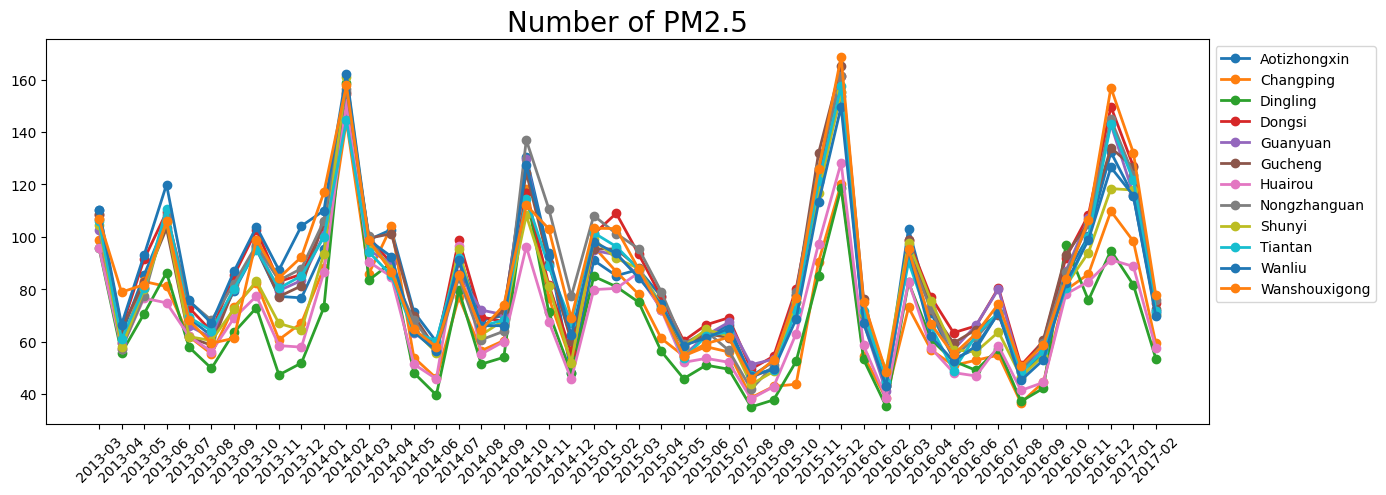

In [23]:
# membuat linechart terkait kandungan PM2.5
plt.figure(figsize=(15,5))
# plt.plot(monthly_PM2p5_df["datetime"].loc[monthly_PM2p5_df["station"]=="Aotizhongxin"],
#          monthly_PM2p5_df["PM2p5_mean_permonth"].loc[monthly_PM2p5_df["station"]=="Aotizhongxin"],
#          label='Aotizhongxin', marker='o', linewidth=2)
# plt.plot(monthly_PM2p5_df["datetime"].loc[monthly_PM2p5_df["station"]=="Changping"],
#          monthly_PM2p5_df["PM2p5_mean_permonth"].loc[monthly_PM2p5_df["station"]=="Changping"],
#          label='Changping', marker='o', linewidth=2)
for i in monthly_PM2p5_df['station'].unique():
    plt.plot(monthly_PM2p5_df["datetime"].loc[monthly_PM2p5_df["station"]==i],
             monthly_PM2p5_df["PM2p5_mean_permonth"].loc[monthly_PM2p5_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of PM2.5", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [24]:
# membuat dataframe yang menampung informasi rata-rata PM 10 setiap bulan pada setiap stasiun
monthly_PM10_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "PM10": "mean"
    })
    monthly_PM10_df = pd.concat([monthly_PM10_df, df], ignore_index=False)
monthly_PM10_df.index = monthly_PM10_df.index.strftime('%Y-%m')
monthly_PM10_df = monthly_PM10_df.reset_index()
monthly_PM10_df.rename(columns={
    "PM10": "PM10_mean_permonth"
}, inplace=True)
monthly_PM10_df= monthly_PM10_df.explode("station", ignore_index=False)
monthly_PM10_df.head(5)

,datetime,station,PM10_mean_permonth
0,2013-03,Aotizhongxin,144.622984
1,2013-04,Aotizhongxin,108.204167
2,2013-05,Aotizhongxin,140.778226
3,2013-06,Aotizhongxin,128.716667
4,2013-07,Aotizhongxin,85.271505


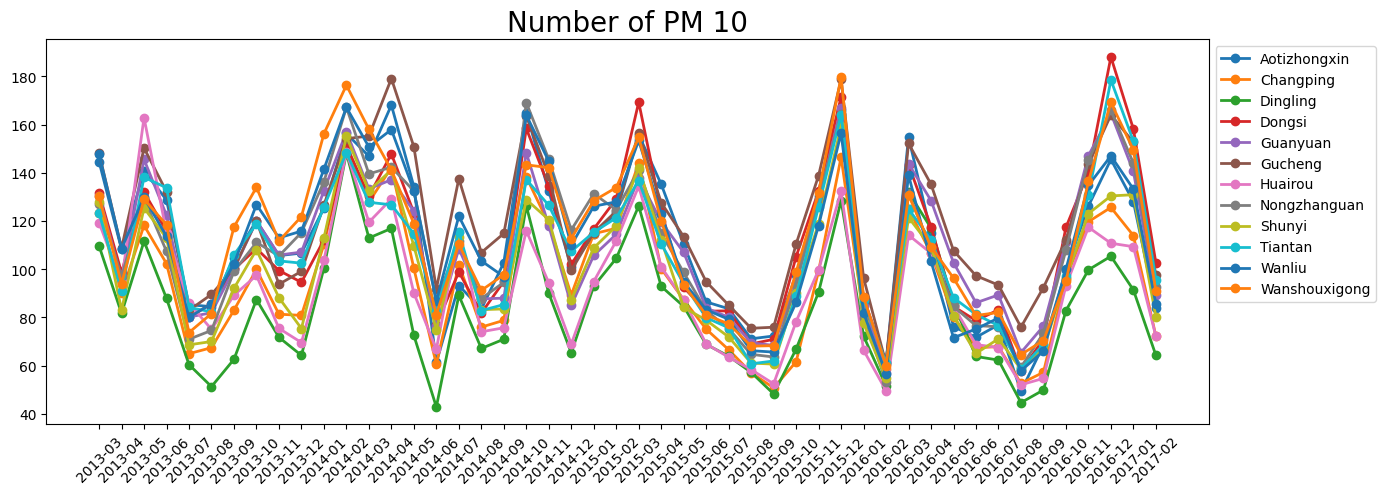

In [25]:
# membuat linechart terkait kandungan PM 10
plt.figure(figsize=(15,5))
for i in monthly_PM10_df['station'].unique():
    plt.plot(monthly_PM10_df["datetime"].loc[monthly_PM10_df["station"]==i],
             monthly_PM10_df["PM10_mean_permonth"].loc[monthly_PM10_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of PM 10", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [26]:
# membuat dataframe yang menampung informasi rata-rata SO2 setiap bulan pada setiap stasiun
monthly_SO2_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "SO2": "mean"
    })
    monthly_SO2_df = pd.concat([monthly_SO2_df, df], ignore_index=False)
monthly_SO2_df.index = monthly_SO2_df.index.strftime('%Y-%m')
monthly_SO2_df = monthly_SO2_df.reset_index()
monthly_SO2_df.rename(columns={
    "SO2": "SO2_mean_permonth"
}, inplace=True)
monthly_SO2_df= monthly_SO2_df.explode("station", ignore_index=False)
monthly_SO2_df.head(5)

,datetime,station,SO2_mean_permonth
0,2013-03,Aotizhongxin,44.945068
1,2013-04,Aotizhongxin,24.796646
2,2013-05,Aotizhongxin,30.442204
3,2013-06,Aotizhongxin,14.627276
4,2013-07,Aotizhongxin,9.285232


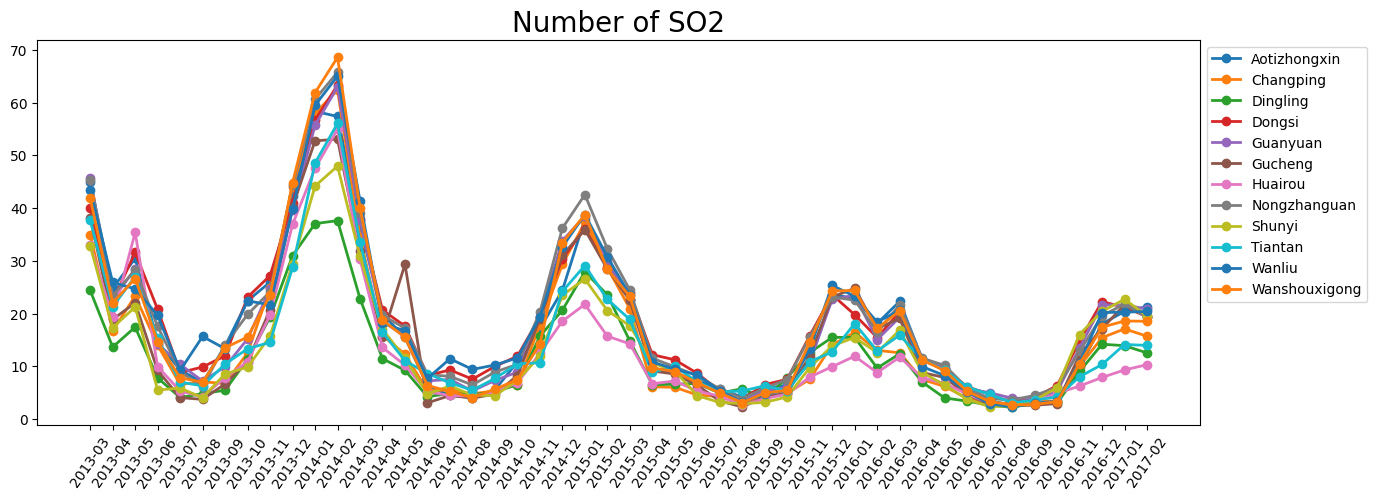

In [27]:
# membuat linechart terkait kandungan SO2 di udara
plt.figure(figsize=(15,5))
for i in monthly_SO2_df['station'].unique():
    plt.plot(monthly_SO2_df["datetime"].loc[monthly_SO2_df["station"]==i],
             monthly_SO2_df["SO2_mean_permonth"].loc[monthly_SO2_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of SO2", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=55)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [28]:
# membuat dataframe yang menampung informasi rata-rata NO2 setiap bulan pada setiap stasiun
monthly_NO2_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "NO2": "mean"
    })
    monthly_NO2_df = pd.concat([monthly_NO2_df, df], ignore_index=False)
monthly_NO2_df.index = monthly_NO2_df.index.strftime('%Y-%m')
monthly_NO2_df = monthly_NO2_df.reset_index()
monthly_NO2_df.rename(columns={
    "NO2": "NO2_mean_permonth"
}, inplace=True)
monthly_NO2_df= monthly_NO2_df.explode("station", ignore_index=False)
monthly_NO2_df.head(5)

,datetime,station,NO2_mean_permonth
0,2013-03,Aotizhongxin,74.817409
1,2013-04,Aotizhongxin,53.501374
2,2013-05,Aotizhongxin,61.016129
3,2013-06,Aotizhongxin,72.798322
4,2013-07,Aotizhongxin,55.105382


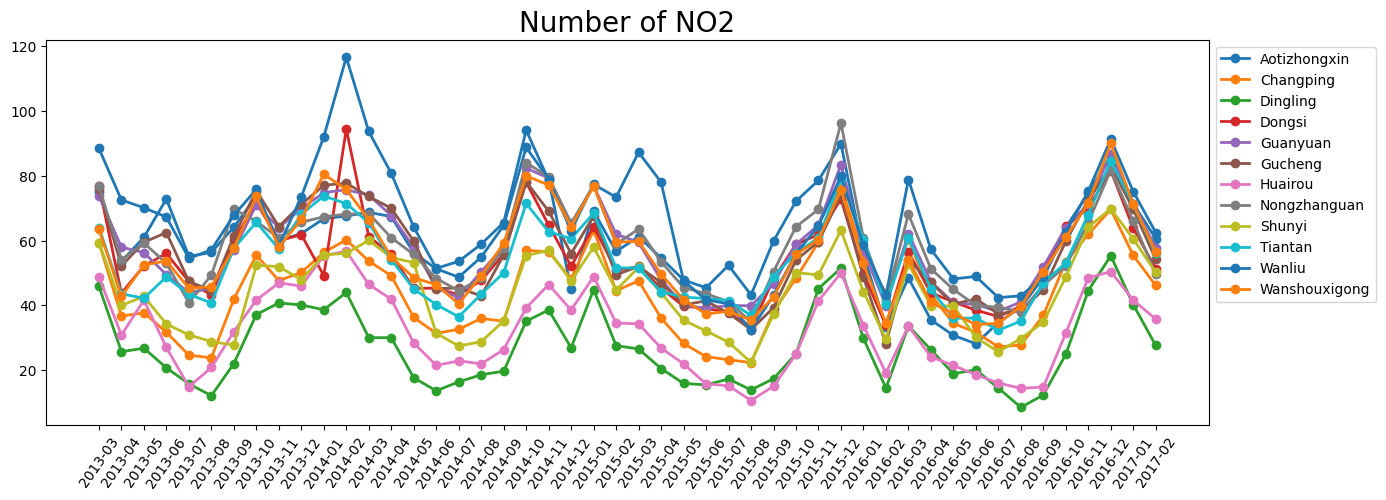

In [29]:
# membuat linechart terkait kandungan NO2 di udara
plt.figure(figsize=(15,5))
for i in monthly_NO2_df['station'].unique():
    plt.plot(monthly_NO2_df["datetime"].loc[monthly_NO2_df["station"]==i],
             monthly_NO2_df["NO2_mean_permonth"].loc[monthly_NO2_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of NO2", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=55)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [30]:
# membuat dataframe yang menampung informasi rata-rata CO setiap bulan pada setiap stasiun
monthly_CO_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "CO": "mean"
    })
    monthly_CO_df = pd.concat([monthly_CO_df, df], ignore_index=False)
monthly_CO_df.index = monthly_CO_df.index.strftime('%Y-%m')
monthly_CO_df = monthly_CO_df.reset_index()
monthly_CO_df.rename(columns={
    "CO": "CO_mean_permonth"
}, inplace=True)
monthly_CO_df= monthly_CO_df.explode("station", ignore_index=False)
monthly_CO_df.head(5)

,datetime,station,CO_mean_permonth
0,2013-03,Aotizhongxin,1477.730511
1,2013-04,Aotizhongxin,910.012500
2,2013-05,Aotizhongxin,944.528226
3,2013-06,Aotizhongxin,1295.164583
4,2013-07,Aotizhongxin,820.551747


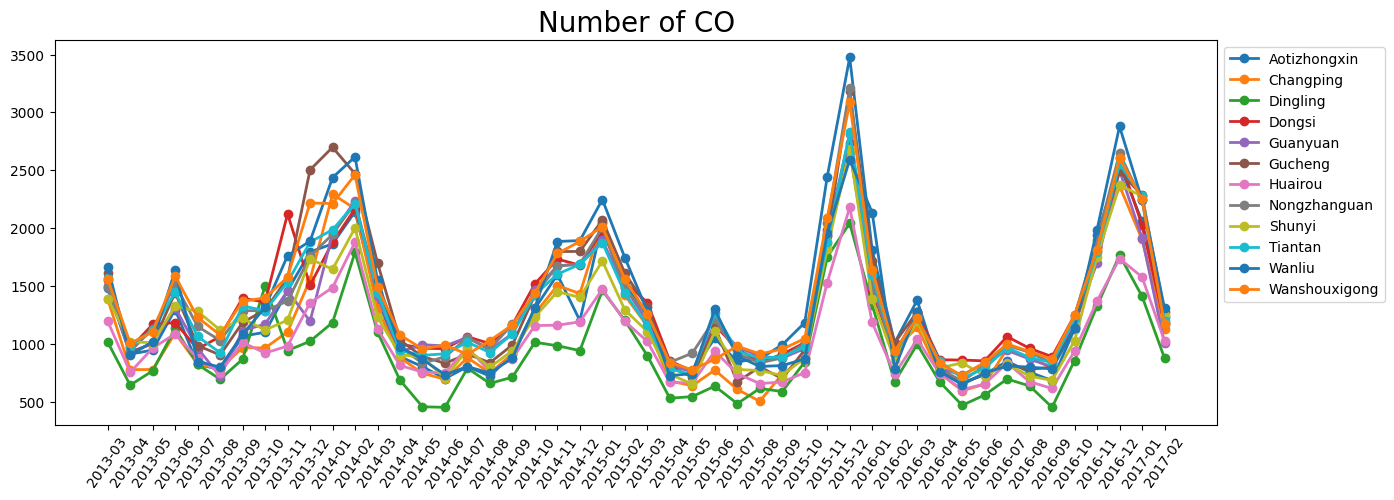

In [31]:
# membuat linechart terkait kandungan CO di udara
plt.figure(figsize=(15,5))
for i in monthly_CO_df['station'].unique():
    plt.plot(monthly_CO_df["datetime"].loc[monthly_CO_df["station"]==i],
             monthly_CO_df["CO_mean_permonth"].loc[monthly_CO_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of CO", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=55)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [32]:
# membuat dataframe yang menampung informasi rata-rata O3 setiap bulan pada setiap stasiun
monthly_O3_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "O3": "mean"
    })
    monthly_O3_df = pd.concat([monthly_O3_df, df], ignore_index=False)
monthly_O3_df.index = monthly_O3_df.index.strftime('%Y-%m')
monthly_O3_df = monthly_O3_df.reset_index()
monthly_O3_df.rename(columns={
    "O3": "O3_mean_permonth"
}, inplace=True)
monthly_O3_df= monthly_O3_df.explode("station", ignore_index=False)
monthly_O3_df.head(5)

,datetime,station,O3_mean_permonth
0,2013-03,Aotizhongxin,46.810691
1,2013-04,Aotizhongxin,48.888799
2,2013-05,Aotizhongxin,74.441171
3,2013-06,Aotizhongxin,68.616993
4,2013-07,Aotizhongxin,71.028915


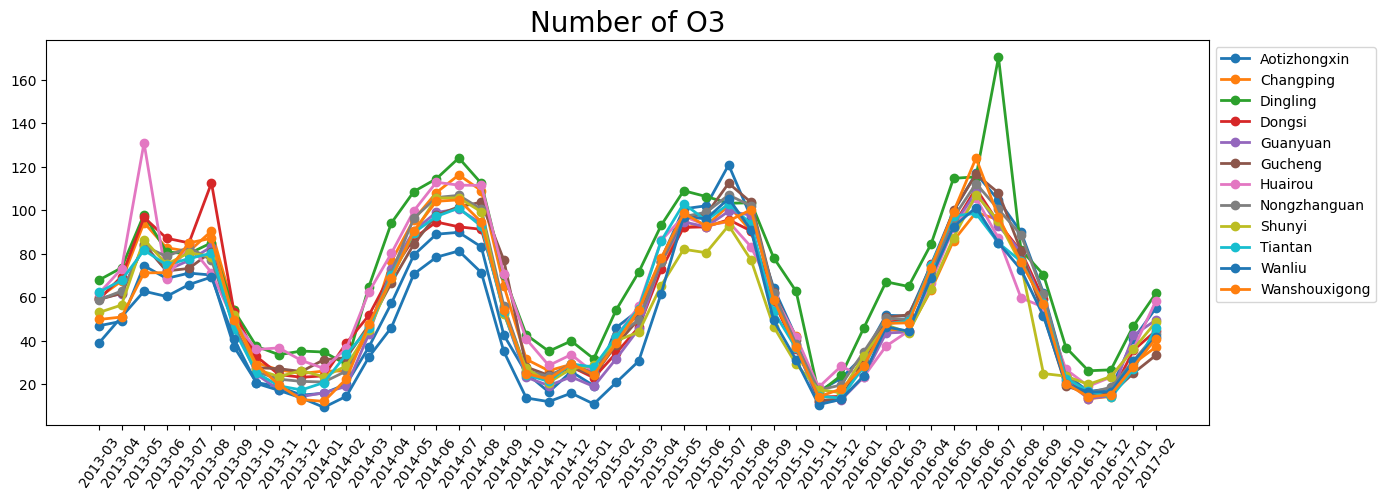

In [33]:
# membuat linechart terkait kandungan O3 di udara
plt.figure(figsize=(15,5))
for i in monthly_O3_df['station'].unique():
    plt.plot(monthly_O3_df["datetime"].loc[monthly_O3_df["station"]==i],
             monthly_O3_df["O3_mean_permonth"].loc[monthly_O3_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of O3", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=55)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Pertanyaan 2: Kapan kualitas udara di semua daerah mencapai angka terbaik dan terburuk?

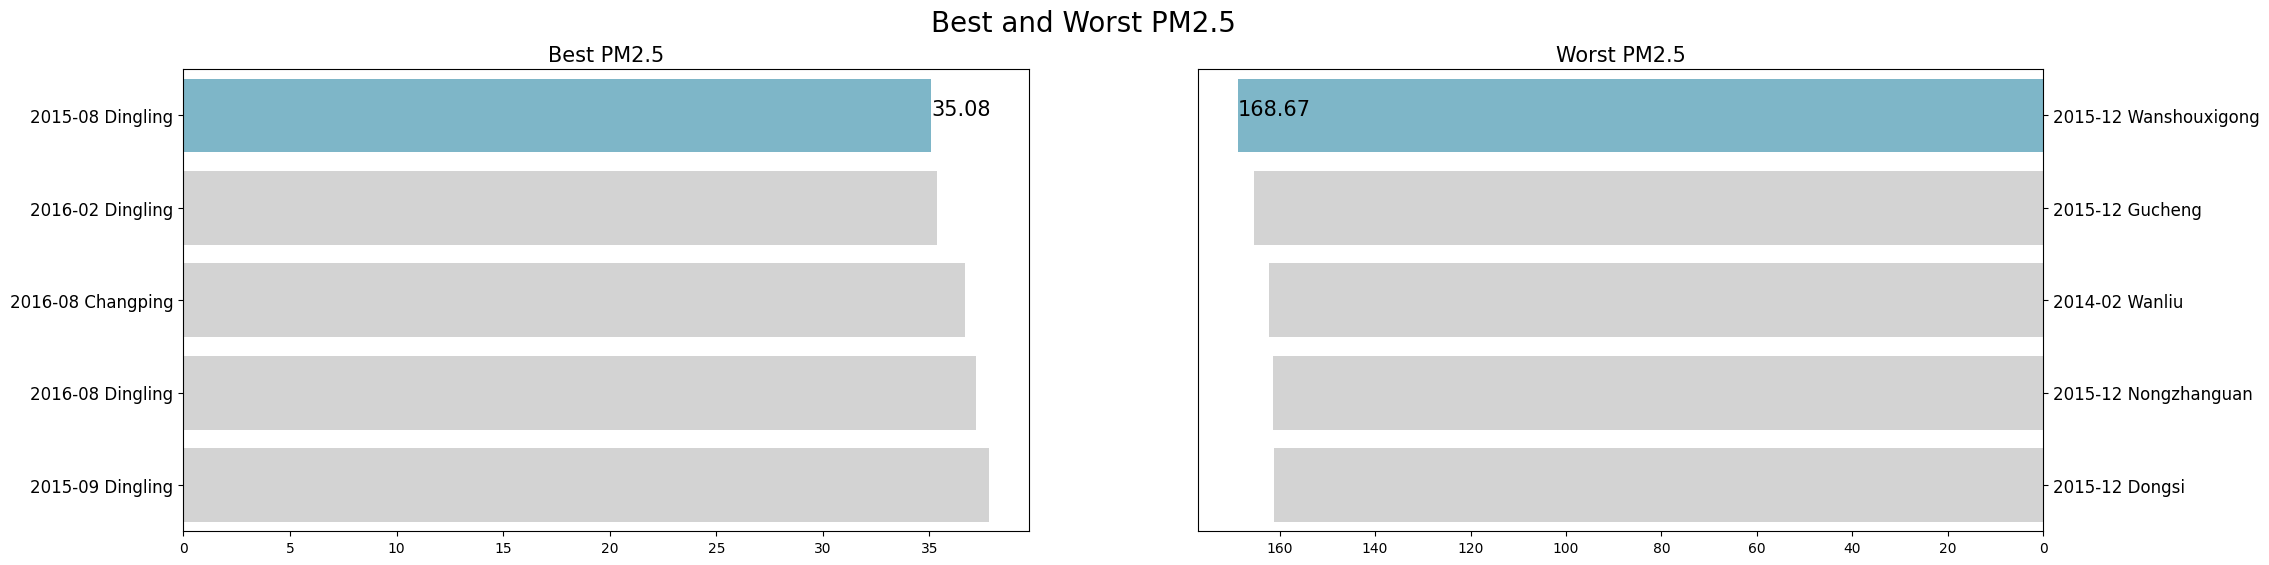

In [34]:
# membuat barchart untuk mengidentifikasi waktu saat PM2.5 mengalami angka terbaik dan terburuk
# mengambil 5 nilai PM 2.5 terbaik dan terburuk
best_5 = monthly_PM2p5_df.sort_values(by="PM2p5_mean_permonth", ascending=True).head(5)
worst_5= monthly_PM2p5_df.sort_values(by="PM2p5_mean_permonth", ascending=False).head(5)

# menggabungkan kolom datetime dan station
best_5["datetime_station"]= best_5['datetime']+' '+best_5['station']
worst_5["datetime_station"]= worst_5['datetime']+' '+worst_5['station']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="datetime_station", x="PM2p5_mean_permonth", data=best_5,
            palette=colors, hue="datetime_station", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best PM2.5", loc="center", fontsize="15")
ax[0].tick_params(axis='y', labelsize=12)
ax[0].annotate(round(best_5["PM2p5_mean_permonth"].iloc[0], 2),
               xy=(best_5["PM2p5_mean_permonth"].iloc[0], best_5["datetime_station"].iloc[0]),
               fontsize=15)

sns.barplot(y="datetime_station", x="PM2p5_mean_permonth", data=worst_5,
            palette=colors, hue='datetime_station', legend=False,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst PM2.5", loc="center", fontsize="15")
ax[1].tick_params(axis='y', labelsize=12)
ax[1].annotate(round(worst_5["PM2p5_mean_permonth"].iloc[0], 2),
               xy=(worst_5["PM2p5_mean_permonth"].iloc[0], worst_5["datetime_station"].iloc[0]),
               fontsize=15)

plt.suptitle("Best and Worst PM2.5", fontsize=20)
plt.show()

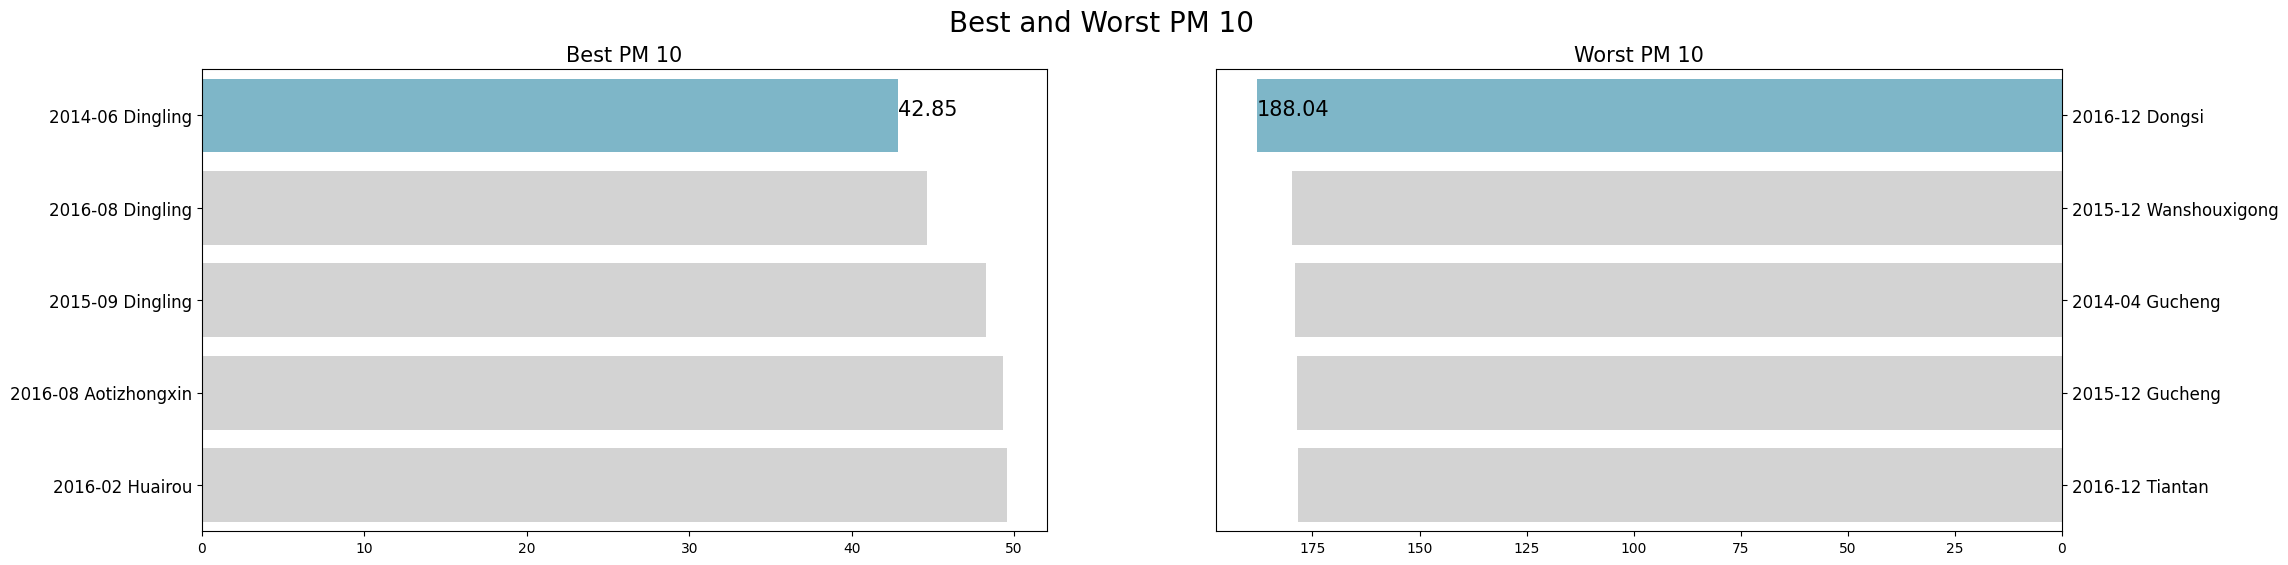

In [35]:
# membuat barchart untuk mengidentifikasi waktu saat PM 10 mengalami angka terbaik dan terburuk
# mengambil 5 nilai PM 10 terbaik dan terburuk
best_5 = monthly_PM10_df.sort_values(by="PM10_mean_permonth", ascending=True).head(5)
worst_5= monthly_PM10_df.sort_values(by="PM10_mean_permonth", ascending=False).head(5)

# menggabungkan kolom datetime dan station
best_5["datetime_station"]= best_5['datetime']+' '+best_5['station']
worst_5["datetime_station"]= worst_5['datetime']+' '+worst_5['station']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="datetime_station", x="PM10_mean_permonth", data=best_5,
            palette=colors, hue="datetime_station", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best PM 10", loc="center", fontsize="15")
ax[0].tick_params(axis='y', labelsize=12)
ax[0].annotate(round(best_5["PM10_mean_permonth"].iloc[0], 2),
               xy=(best_5["PM10_mean_permonth"].iloc[0], best_5["datetime_station"].iloc[0]),
               fontsize=15)

sns.barplot(y="datetime_station", x="PM10_mean_permonth", data=worst_5,
            palette=colors, hue='datetime_station', legend=False,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst PM 10", loc="center", fontsize="15")
ax[1].tick_params(axis='y', labelsize=12)
ax[1].annotate(round(worst_5["PM10_mean_permonth"].iloc[0], 2),
               xy=(worst_5["PM10_mean_permonth"].iloc[0], worst_5["datetime_station"].iloc[0]),
               fontsize=15)

plt.suptitle("Best and Worst PM 10", fontsize=20)
plt.show()

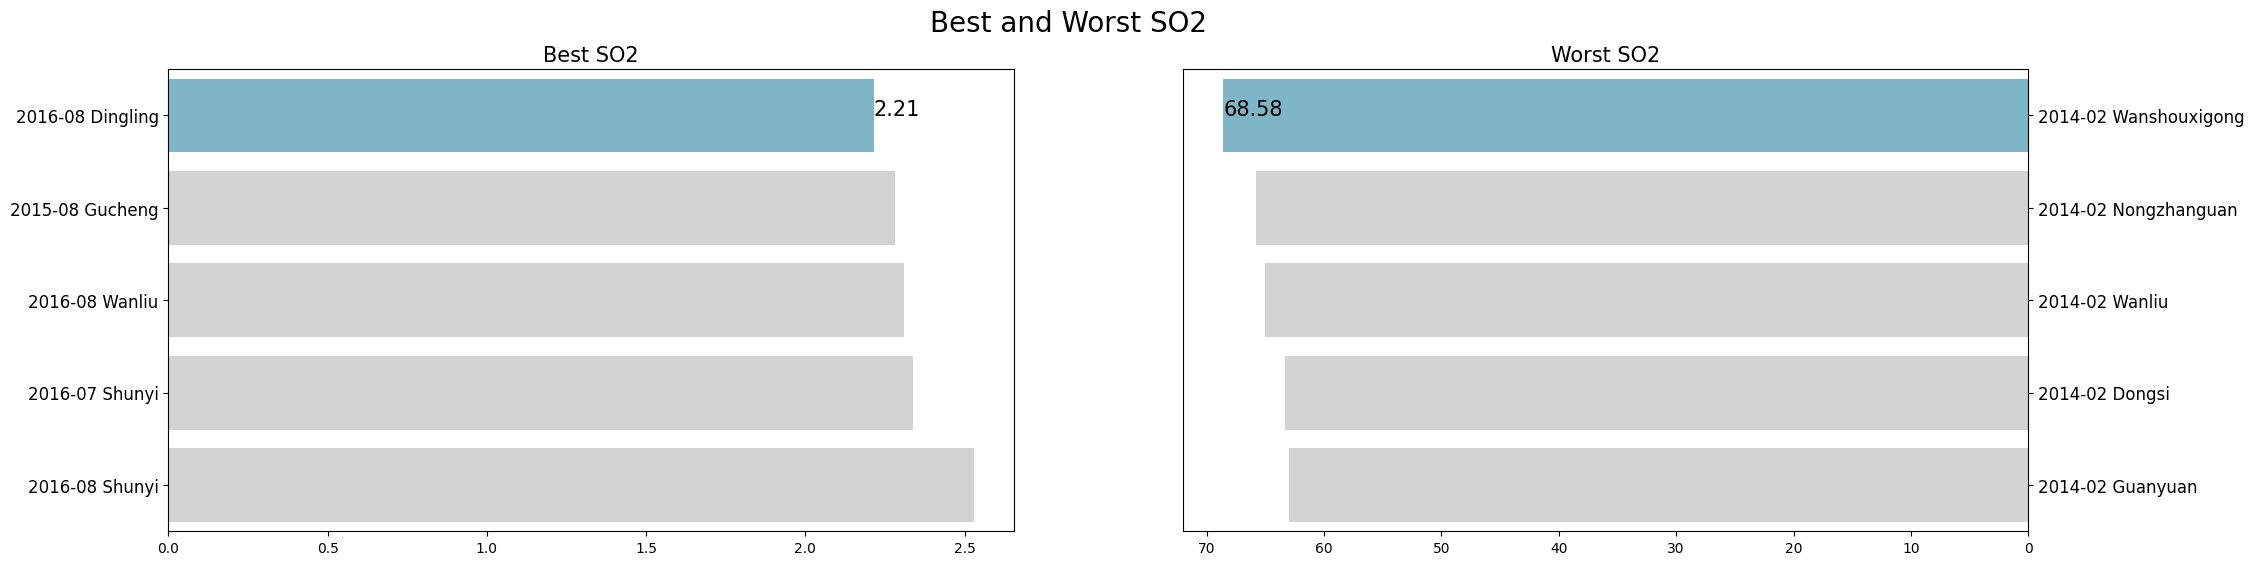

In [36]:
# membuat barchart untuk mengidentifikasi waktu saat SO2 mengalami angka terbaik dan terburuk
# mengambil 5 nilai SO2 terbaik dan terburuk
best_5 = monthly_SO2_df.sort_values(by="SO2_mean_permonth", ascending=True).head(5)
worst_5= monthly_SO2_df.sort_values(by="SO2_mean_permonth", ascending=False).head(5)

# menggabungkan kolom datetime dan station
best_5["datetime_station"]= best_5['datetime']+' '+best_5['station']
worst_5["datetime_station"]= worst_5['datetime']+' '+worst_5['station']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="datetime_station", x="SO2_mean_permonth", data=best_5,
            palette=colors, hue="datetime_station", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best SO2", loc="center", fontsize="15")
ax[0].tick_params(axis='y', labelsize=12)
ax[0].annotate(round(best_5["SO2_mean_permonth"].iloc[0], 2),
               xy=(best_5["SO2_mean_permonth"].iloc[0], best_5["datetime_station"].iloc[0]),
               fontsize=15)

sns.barplot(y="datetime_station", x="SO2_mean_permonth", data=worst_5,
            palette=colors, hue='datetime_station', legend=False,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst SO2", loc="center", fontsize="15")
ax[1].tick_params(axis='y', labelsize=12)
ax[1].annotate(round(worst_5["SO2_mean_permonth"].iloc[0], 2),
               xy=(worst_5["SO2_mean_permonth"].iloc[0], worst_5["datetime_station"].iloc[0]),
               fontsize=15)

plt.suptitle("Best and Worst SO2", fontsize=20)
plt.show()

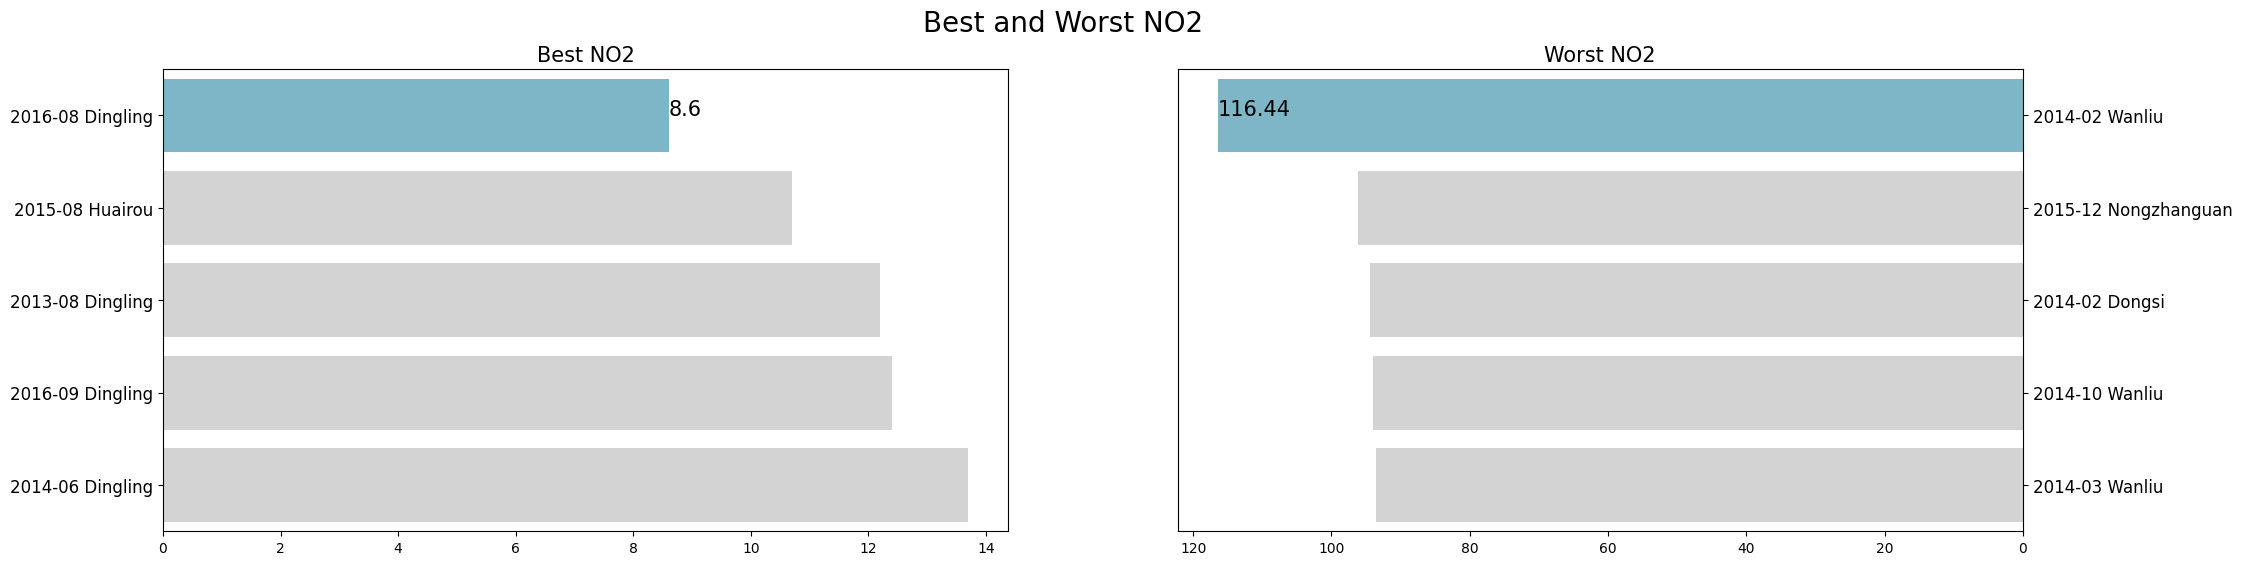

In [37]:
# membuat barchart untuk mengidentifikasi waktu saat NO2 mengalami angka terbaik dan terburuk
# mengambil 5 nilai NO2 terbaik dan terburuk
best_5 = monthly_NO2_df.sort_values(by="NO2_mean_permonth", ascending=True).head(5)
worst_5= monthly_NO2_df.sort_values(by="NO2_mean_permonth", ascending=False).head(5)

# menggabungkan kolom datetime dan station
best_5["datetime_station"]= best_5['datetime']+' '+best_5['station']
worst_5["datetime_station"]= worst_5['datetime']+' '+worst_5['station']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="datetime_station", x="NO2_mean_permonth", data=best_5,
            palette=colors, hue="datetime_station", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best NO2", loc="center", fontsize="15")
ax[0].tick_params(axis='y', labelsize=12)
ax[0].annotate(round(best_5["NO2_mean_permonth"].iloc[0], 2),
               xy=(best_5["NO2_mean_permonth"].iloc[0], best_5["datetime_station"].iloc[0]),
               fontsize=15)

sns.barplot(y="datetime_station", x="NO2_mean_permonth", data=worst_5,
            palette=colors, hue='datetime_station', legend=False,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst NO2", loc="center", fontsize="15")
ax[1].tick_params(axis='y', labelsize=12)
ax[1].annotate(round(worst_5["NO2_mean_permonth"].iloc[0], 2),
               xy=(worst_5["NO2_mean_permonth"].iloc[0], worst_5["datetime_station"].iloc[0]),
               fontsize=15)

plt.suptitle("Best and Worst NO2", fontsize=20)
plt.show()

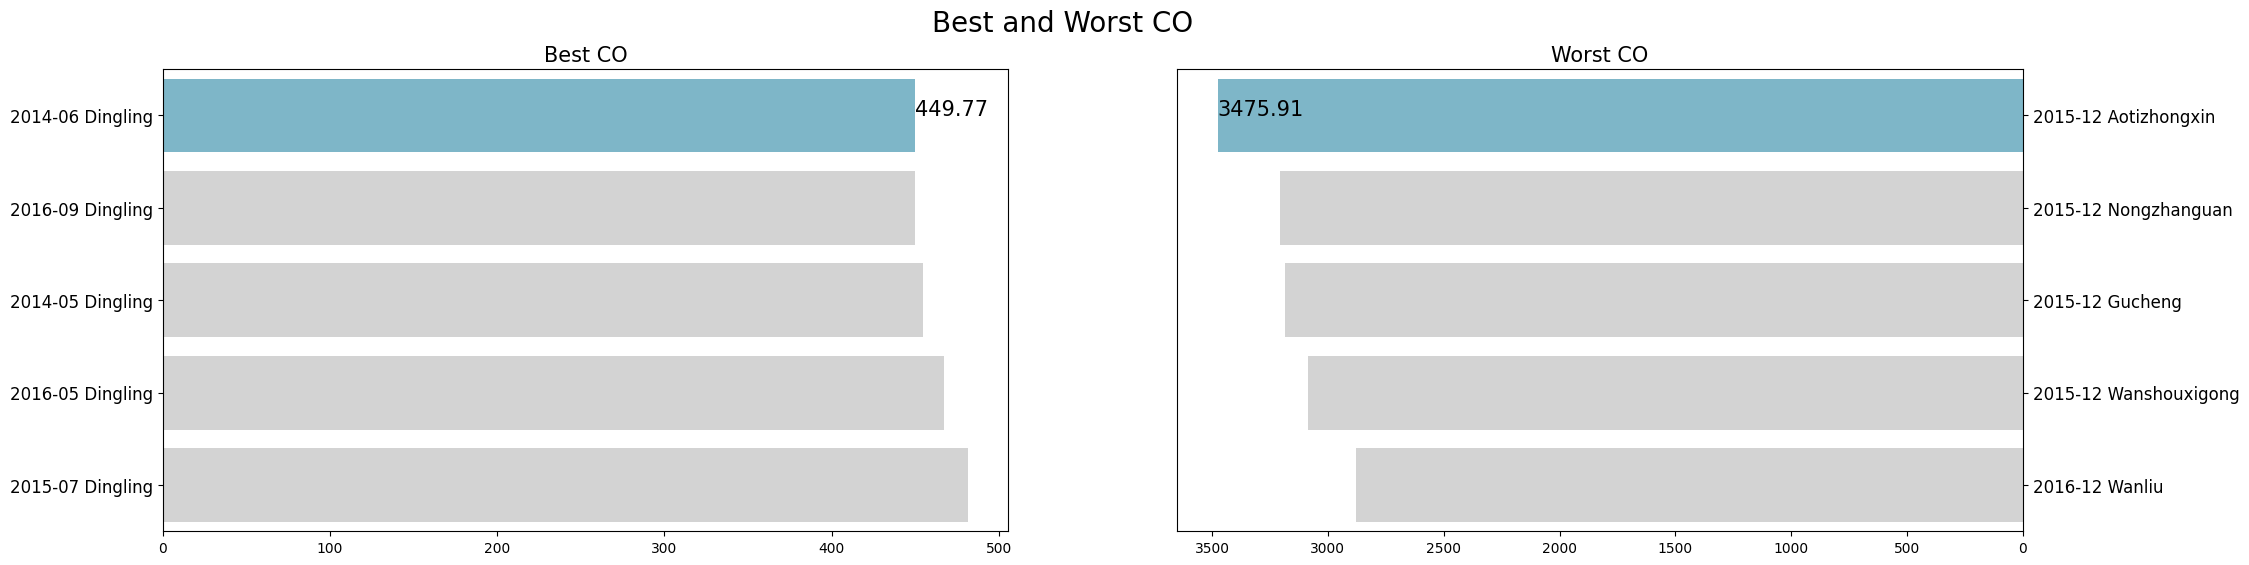

In [38]:
# membuat barchart untuk mengidentifikasi waktu saat CO mengalami angka terbaik dan terburuk
# mengambil 5 nilai CO terbaik dan terburuk
best_5 = monthly_CO_df.sort_values(by="CO_mean_permonth", ascending=True).head(5)
worst_5= monthly_CO_df.sort_values(by="CO_mean_permonth", ascending=False).head(5)

# menggabungkan kolom datetime dan station
best_5["datetime_station"]= best_5['datetime']+' '+best_5['station']
worst_5["datetime_station"]= worst_5['datetime']+' '+worst_5['station']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="datetime_station", x="CO_mean_permonth", data=best_5,
            palette=colors, hue="datetime_station", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best CO", loc="center", fontsize="15")
ax[0].tick_params(axis='y', labelsize=12)
ax[0].annotate(round(best_5["CO_mean_permonth"].iloc[0], 2),
               xy=(best_5["CO_mean_permonth"].iloc[0], best_5["datetime_station"].iloc[0]),
               fontsize=15)

sns.barplot(y="datetime_station", x="CO_mean_permonth", data=worst_5,
            palette=colors, hue='datetime_station', legend=False,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst CO", loc="center", fontsize="15")
ax[1].tick_params(axis='y', labelsize=12)
ax[1].annotate(round(worst_5["CO_mean_permonth"].iloc[0], 2),
               xy=(worst_5["CO_mean_permonth"].iloc[0], worst_5["datetime_station"].iloc[0]),
               fontsize=15)

plt.suptitle("Best and Worst CO", fontsize=20)
plt.show()

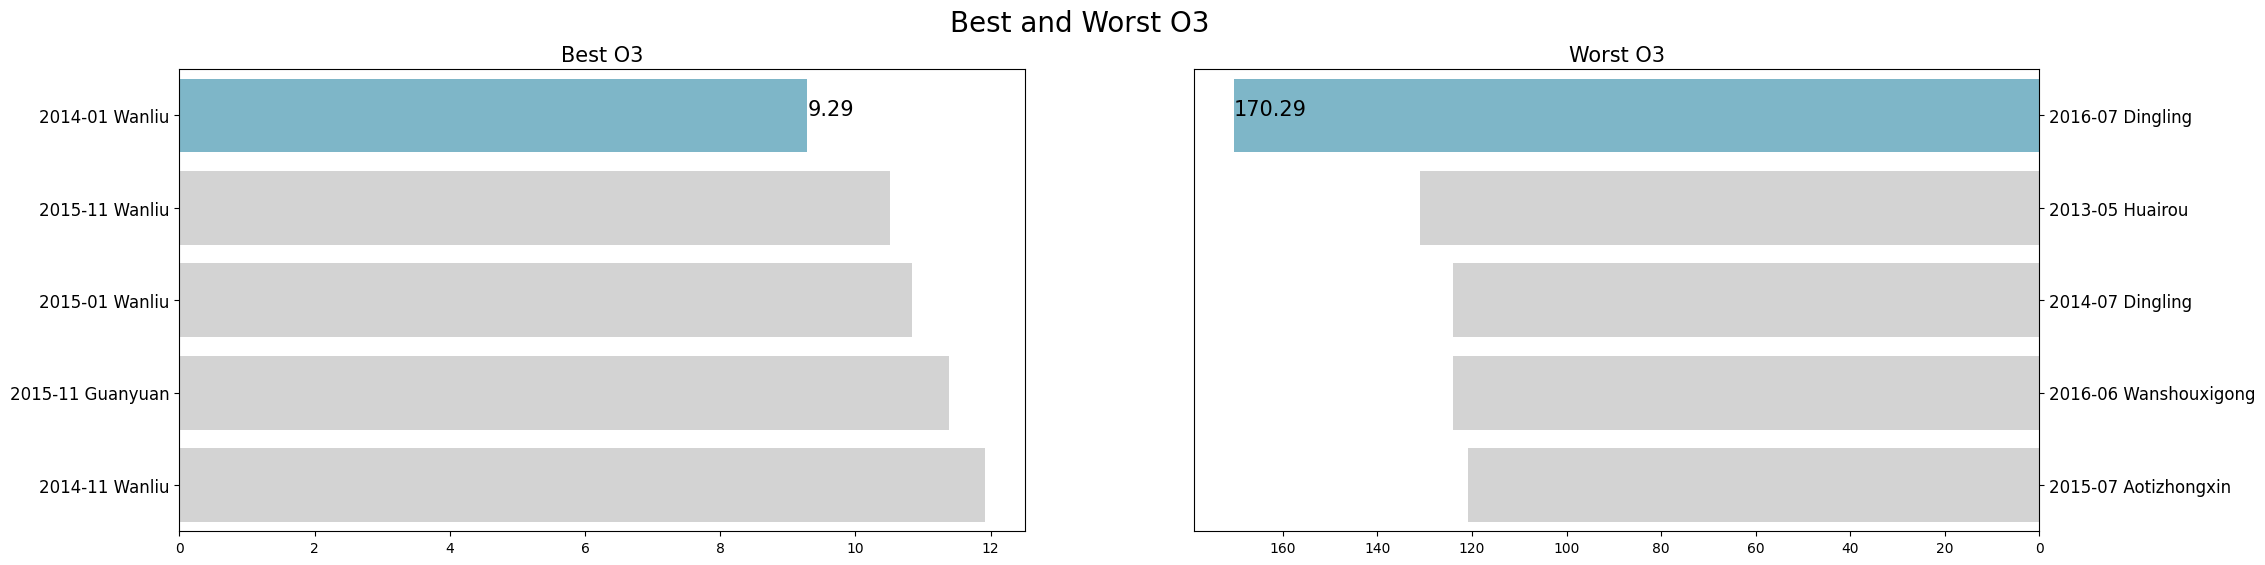

In [39]:
# membuat barchart untuk mengidentifikasi waktu saat O3 mengalami angka terbaik dan terburuk
# mengambil 5 nilai O3 terbaik dan terburuk
best_5 = monthly_O3_df.sort_values(by="O3_mean_permonth", ascending=True).head(5)
worst_5= monthly_O3_df.sort_values(by="O3_mean_permonth", ascending=False).head(5)

# menggabungkan kolom datetime dan station
best_5["datetime_station"]= best_5['datetime']+' '+best_5['station']
worst_5["datetime_station"]= worst_5['datetime']+' '+worst_5['station']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="datetime_station", x="O3_mean_permonth", data=best_5,
            palette=colors, hue="datetime_station", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best O3", loc="center", fontsize="15")
ax[0].tick_params(axis='y', labelsize=12)
ax[0].annotate(round(best_5["O3_mean_permonth"].iloc[0], 2),
               xy=(best_5["O3_mean_permonth"].iloc[0], best_5["datetime_station"].iloc[0]),
               fontsize=15)

sns.barplot(y="datetime_station", x="O3_mean_permonth", data=worst_5,
            palette=colors, hue='datetime_station', legend=False,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst O3", loc="center", fontsize="15")
ax[1].tick_params(axis='y', labelsize=12)
ax[1].annotate(round(worst_5["O3_mean_permonth"].iloc[0], 2),
               xy=(worst_5["O3_mean_permonth"].iloc[0], worst_5["datetime_station"].iloc[0]),
               fontsize=15)

plt.suptitle("Best and Worst O3", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana kondisi curah hujan setiap lokasi dalam kurun waktu 2013-2017?

In [40]:
# membuat dataframe yang menampung informasi rata-rata curah hujan setiap bulan pada setiap stasiun
monthly_RAIN_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "RAIN": "mean"
    })
    monthly_RAIN_df = pd.concat([monthly_RAIN_df, df], ignore_index=False)
monthly_RAIN_df.index = monthly_RAIN_df.index.strftime('%Y-%m')
monthly_RAIN_df = monthly_RAIN_df.reset_index()
monthly_RAIN_df.rename(columns={
    "RAIN": "RAIN_mean_permonth"
}, inplace=True)
monthly_RAIN_df= monthly_RAIN_df.explode("station", ignore_index=False)
monthly_RAIN_df.head(5)

,datetime,station,RAIN_mean_permonth
0,2013-03,Aotizhongxin,0.026210
1,2013-04,Aotizhongxin,0.015139
2,2013-05,Aotizhongxin,0.007796
3,2013-06,Aotizhongxin,0.130694
4,2013-07,Aotizhongxin,0.293817


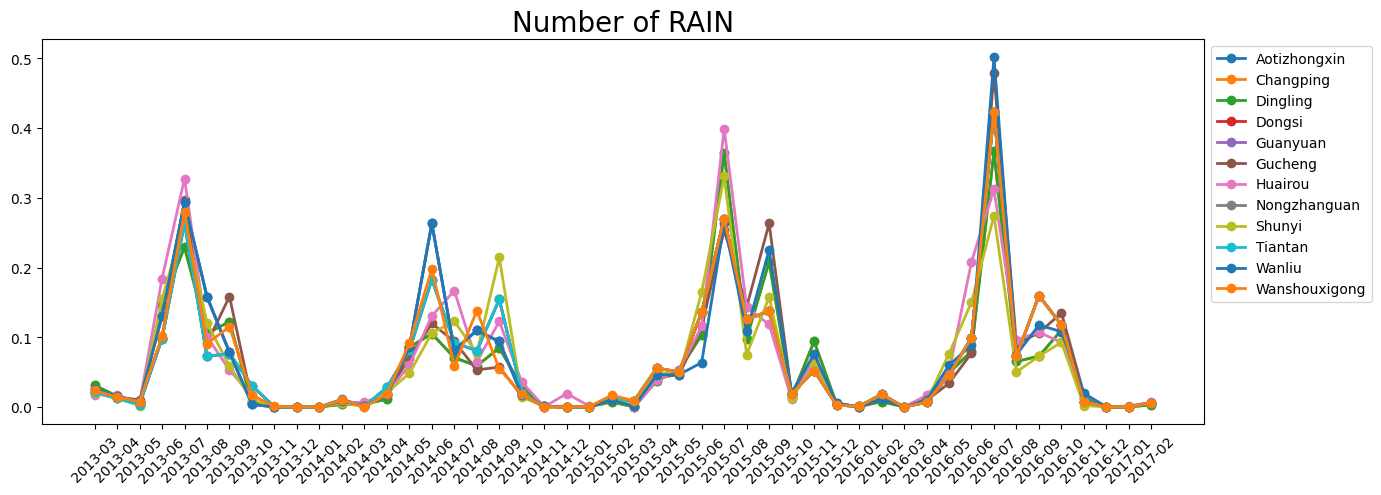

In [41]:
# membuat linechart terkait curah hujan
plt.figure(figsize=(15,5))
for i in monthly_RAIN_df['station'].unique():
    plt.plot(monthly_RAIN_df["datetime"].loc[monthly_RAIN_df["station"]==i],
             monthly_RAIN_df["RAIN_mean_permonth"].loc[monthly_RAIN_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of RAIN", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Pertanyaan 4: Berapa rata-rata temperatur terendah dan tertinggi yang pernah dialami?

In [42]:
# membuat dataframe yang menampung informasi rata-rata temperature (TEMP) setiap bulan pada setiap stasiun
monthly_TEMP_df = pd.DataFrame()
for i in all_df['station'].unique():
    df = all_df[all_df['station']==i].resample(rule='M', on='datetime').agg({
        "station": "unique",
        "TEMP": "mean"
    })
    monthly_TEMP_df = pd.concat([monthly_TEMP_df, df], ignore_index=False)
monthly_TEMP_df.index = monthly_TEMP_df.index.strftime('%Y-%m')
monthly_TEMP_df = monthly_TEMP_df.reset_index()
monthly_TEMP_df.rename(columns={
    "TEMP": "TEMP_mean_permonth"
}, inplace=True)
monthly_TEMP_df= monthly_TEMP_df.explode("station", ignore_index=False)
monthly_TEMP_df.head(5)

,datetime,station,TEMP_mean_permonth
0,2013-03,Aotizhongxin,6.053629
1,2013-04,Aotizhongxin,12.260694
2,2013-05,Aotizhongxin,21.374194
3,2013-06,Aotizhongxin,23.386111
4,2013-07,Aotizhongxin,26.877419


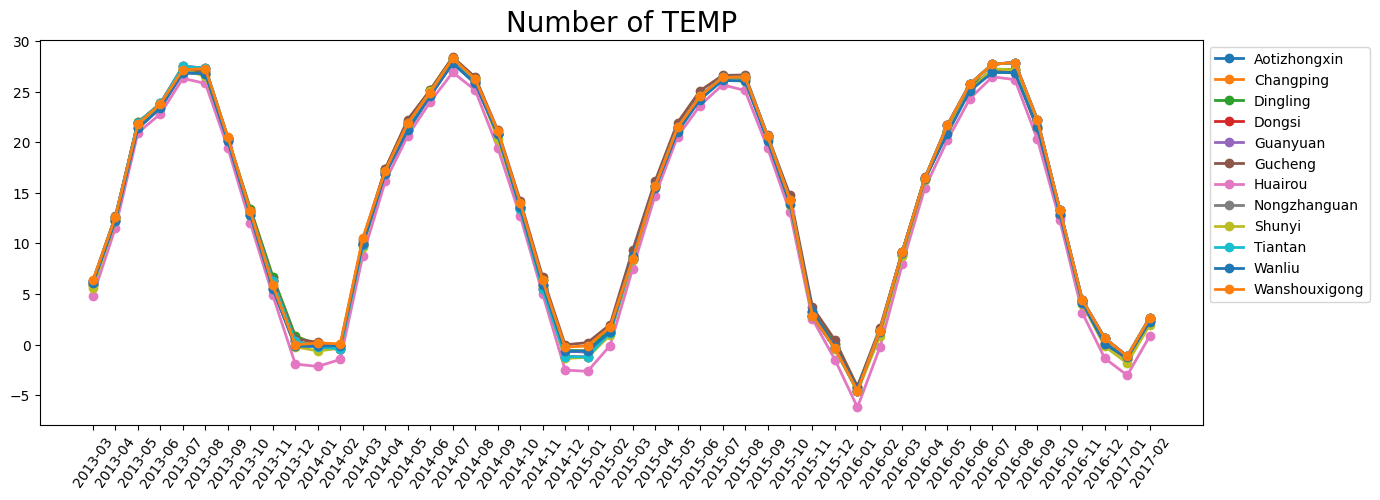

In [43]:
# membuat linechart terkait temperatur udara
plt.figure(figsize=(15,5))
for i in monthly_O3_df['station'].unique():
    plt.plot(monthly_TEMP_df["datetime"].loc[monthly_TEMP_df["station"]==i],
             monthly_TEMP_df["TEMP_mean_permonth"].loc[monthly_TEMP_df["station"]==i],
             label=i, marker='o', linewidth=2)
plt.title("Number of TEMP", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=55)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

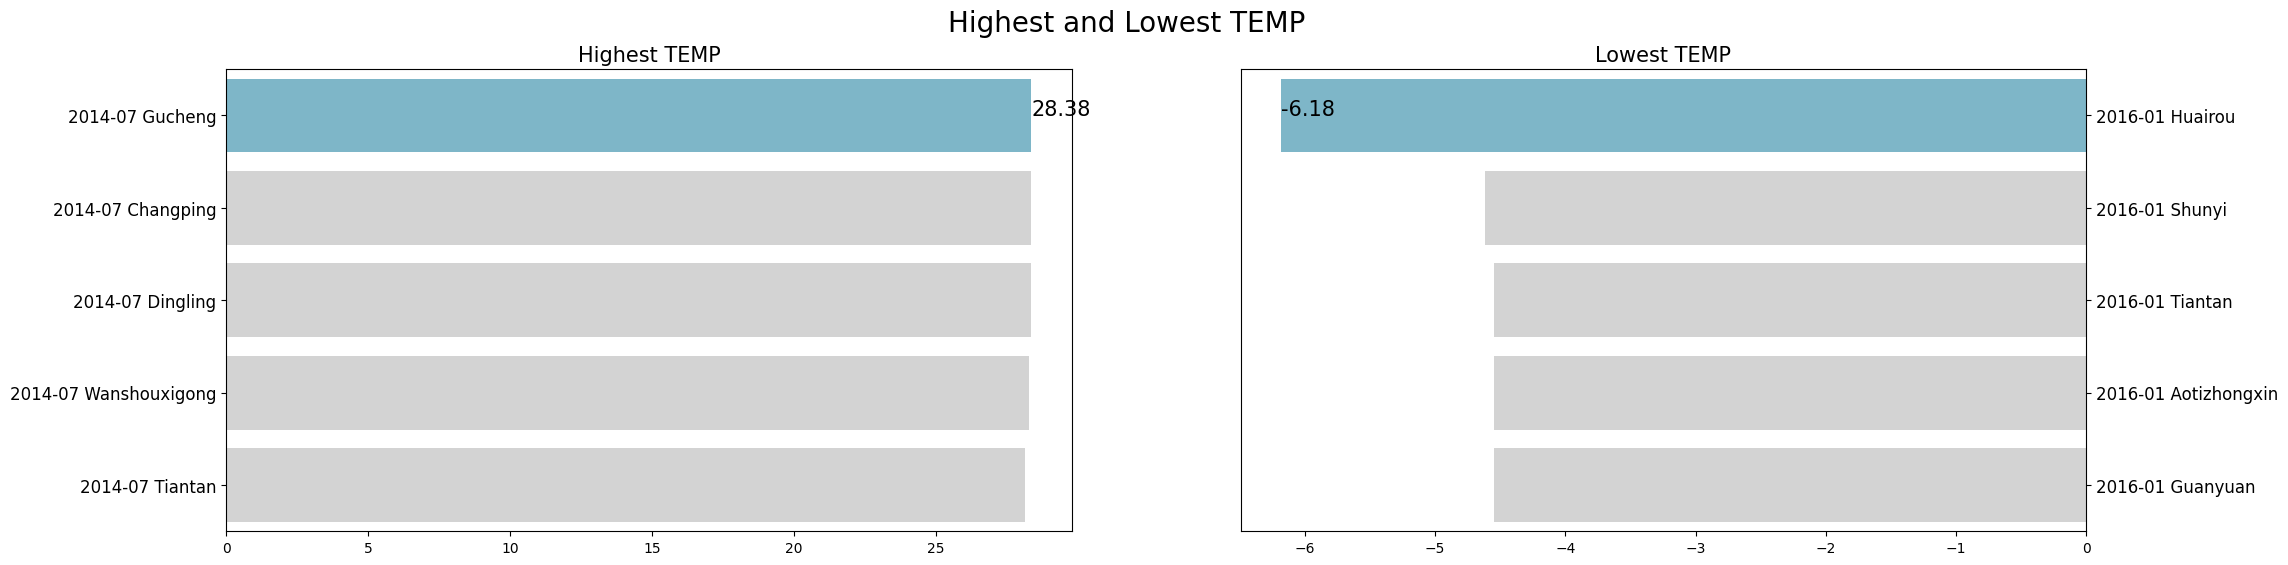

In [44]:
# membuat barchart untuk mengidentifikasi waktu saat temperatur mengalami titik terendah dan tertinggi
# mengambil 5 nilai O3 terbaik dan terburuk
low_5 = monthly_TEMP_df.sort_values(by="TEMP_mean_permonth", ascending=True).head(5)
high_5= monthly_TEMP_df.sort_values(by="TEMP_mean_permonth", ascending=False).head(5)

# menggabungkan kolom datetime dan station
low_5["datetime_station"]= low_5['datetime']+' '+low_5['station']
high_5["datetime_station"]= high_5['datetime']+' '+high_5['station']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="datetime_station", x="TEMP_mean_permonth", data=high_5,
            palette=colors, hue='datetime_station', legend=False,ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Highest TEMP", loc="center", fontsize="15")
ax[0].tick_params(axis='y', labelsize=12)
ax[0].annotate(round(high_5["TEMP_mean_permonth"].iloc[0], 2),
               xy=(high_5["TEMP_mean_permonth"].iloc[0], high_5["datetime_station"].iloc[0]),
               fontsize=15)

sns.barplot(y="datetime_station", x="TEMP_mean_permonth", data=low_5,
            palette=colors, hue="datetime_station", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Lowest TEMP", loc="center", fontsize="15")
ax[1].tick_params(axis='y', labelsize=12)
ax[1].annotate(round(low_5["TEMP_mean_permonth"].iloc[0], 2),
               xy=(low_5["TEMP_mean_permonth"].iloc[0], low_5["datetime_station"].iloc[0]),
               fontsize=15)

plt.suptitle("Highest and Lowest TEMP", fontsize=20)
plt.show()

## Conclusion

- Kualitas udara di 12 stasiun dalam kurun waktu 2013-2017 mengalami perubahan setiap beberapa bulan. Dilihat dari kondisi partikel PM 2.5, partikel tersebut mengalami beberapa kali lonjakan pada Januari 2014 dan Oktiber 2015, dan mengalami nilai terendah pada Juli 2015, Januari 2016, dan Juli 2016. Partikel PM 10 mengalami kenaikan dan penurunan angka cukup sering. Kondisi SO2 mengalami lonjakan pada November 2013, tetapi cenderung cukup stabil sejak April 2015. Dilihat dari NO2, pada Oktober 2014, Desembere 2015, dan Desember 2016 cenderung mengalami kenaikan NO2. Kondisi partikel CO di setiap stasiun cukup mirip, yaitu mengalami kenaikan pada Desember 2013, Januari 2015, November 2015, dan Desember 2016, sedangkan pada bulan Maret-Oktober, partikel ini cukup stabil. Kondisi O3 di setiap stasiun juga cukup mirip, dan mengalami pola yang cukup mirip setiap tahunnya, yaitu mengalami kenaikan pada bulan Maret dan mengalami penurunan pada bulan Agustus.
- Kondisi kuailtas udara di 12 stasiun mencapai angkat terbaik(terendah) dan terburuk (tertinggi) bergantung pada kondisi partikel polutan. Partikel PM 2.5 terbaik berada di Stasiun Dingling pada Agustus 2015 dengan angka 35.08 dan kondisi terburuk berada di Stasiun Wanshouxigong pada Desember 2015 dengan angka 168.67. Kondisi PM 10 terbaik ada di Stasiun Dingling pada Agustus 2018 dengan nilai 42.85 dan terburuk ada di Stasiun Dongsi pada Desember 2016 dengan angka 188.04. Kondisi SO2 terbaik terjadi pada Agustus 2016 di Stasiun Dingling dengan nilai 2.21 dan kondisi terburuk terjadi di Wanshouxigong dengan angka 68.58 pada Februari 2014. Kondisi NO2 terbaik berada di Stasiun Dingling pada Agustus 2016 dengan nilai 8.6 dan terburuk ada di Stasiun Wanliu pada Februari 2014. Kondisi CO terbaik berada si Stasiun Dingling pada Agustus 2016 dengan angka 449.77 dan terburuk ada di Stasiun Aotizhongxin pada Desember 2015 dengan nilai 3475.91. Sedangkan Kondisi O3 terbaik selalu berada di Stasiun Wanliu pada Januari 2014 dengan angka 9.29 dan terburuk berada di Stasiun Dingling pada Juli 2016 dengan angka 170.29.
- Kondisi curah hujan setiap lokasi dalam kurun waktu 2013-2017 memiliki variasi yang mirip, yaitu cenderung mengalami kondisi tertinggi pada bulan Juli dan cenderung rendah pada bulan September-Me
- Rata-rata temperatur pada keduabelas stasiun cenderung mirip. Temperatur selalu mencapai titik tertinggi pada bulan Juli dan berada di titik terendah pada bulan Januari. Rata-rata perbulan temperatur terendah berada di Stasiun Huairou dengan suhu -6.18 sedangkan temperatur tertinggi berada di Stasiun Gucheng dengan suhu 28.38.i

# Export

In [45]:
# eksport data yang telah dibersihkan dan akan digunakan pada dashboard
# eksportr data dalam format pickle agar tipe data tidak berubah
all_df.to_pickle('dashboard/all_df.pkl')